## Business Understanding

The dataset dataset provides a detailed and comprehensive collection of aviation dataset which will help us determine which aircraft are the lowest risk for the company to start in this new aviation business. 

It encompases a wide range of information and from this, the stakeholder is interested to uncover trends and insights regarding aviation accidents in the USA and in international waters from 1962 to 2023.

### Business Goal

#### 1. Understanding Aviation risks:
Identify key factors that influence flight accidents, such as year, instrument use,location engines, purpose…
#### 2. Identifying Trends:
Explore patterns in accidents across various countries, period…
#### 3. Recommendations
Provide actionable recommendations to minimize the accidents and fatalities .

### Questions to Address:
 1. Does evolution of time has an influence on the number of accidents?
2. Is purpose of the aircraft a contributing factor to accidents?
3. Is the weather instrument in use to measure the condition a contributing factor?
4. Does the number of engines a contributing factor?


## Data Understanding

While we have quite a number of feature in the datset, we will explore them below and focus and the data meeting the qualities of good data.

## Loading the data 

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Ecoding passed to handle the error in loading 

df=pd.read_csv ('AviationData.csv',encoding='latin1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Exploratory Data Analysis - EDA with initial cleaning

In [3]:
#Lets look at the shape of our dataset

In [4]:
df.shape

(88889, 31)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# Find information about data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Based on the above, lets compute the counts of missing variables per columns

In [8]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [9]:
#Proportionwise of th missing variables
df.isnull().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

##### Clearly we need to drop the columns having more missing values, For this case, I will set a threshold of 30%

In [10]:

threshold = 0.3

#Calculating the proportion
High_missing=df.isnull().mean()

#Identifying those columns

Col_High_miss=High_missing[High_missing>threshold].index.tolist()

Col_High_miss

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier',
 'Broad.phase.of.flight']

In [11]:
df=df.drop(Col_High_miss, axis=1)

In [12]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


In [13]:
#To check some descriptive including the categorical features

df.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,87889,85695,87507,88826,...,82805.000000,81793,82697,77488.000000,76379.000000,76956.000000,82977.000000,84397,82505,75118
unique,87951,2,88863,14782,27758,219,109,4,79104,8237,...,NaN,12,26,NaN,NaN,NaN,NaN,4,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,NONE,Cessna,...,NaN,Reciprocating,Personal,NaN,NaN,NaN,NaN,VMC,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,67357,64148,344,22227,...,NaN,69530,49448,NaN,NaN,NaN,NaN,77303,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.146585,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.446510,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN


In [14]:
df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
Publication.Date          13771
dtype: int64

In [15]:
#check for  duplicated records
df.duplicated().sum()

0

In [16]:
df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [17]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [18]:
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [19]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [20]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [21]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [22]:
#combine unk and UNK together
df['Weather.Condition']=df['Weather.Condition'].replace('Unk','UNK')

In [23]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [24]:
#create year column from the event date and make it categorical 

df['Event.Date']=pd.to_datetime(df['Event.Date'])
df['Event_year']=df['Event.Date'].dt.year #.astype(str)


In [25]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Event_year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,1974


#### Lets Explore some categorical variables

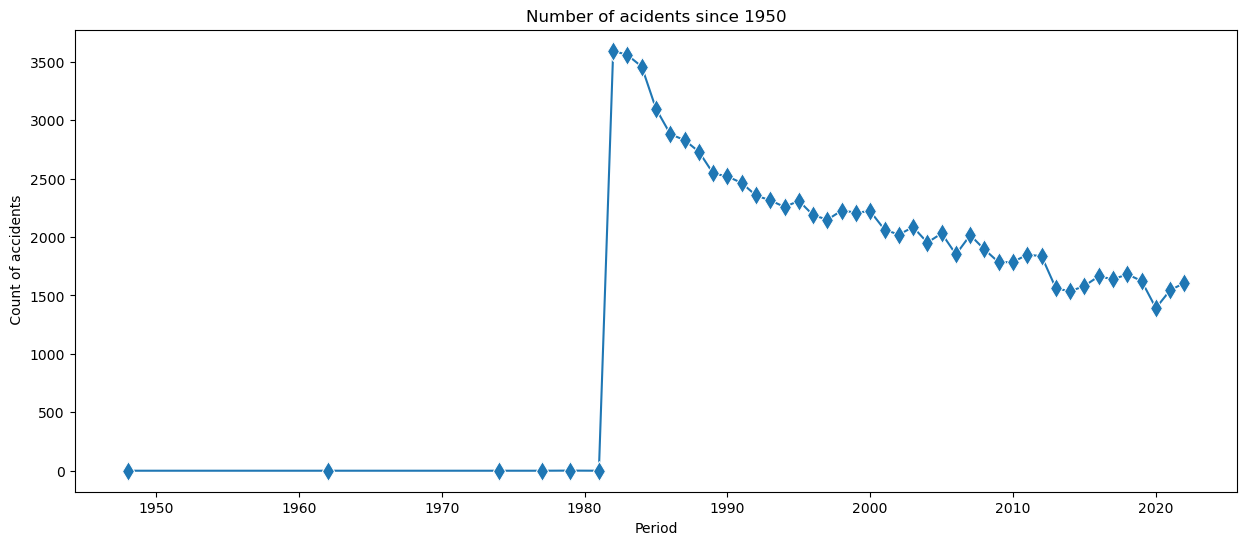

In [26]:
#Grouping while summarizing the counts per group 
yr_count=df.groupby('Event_year')['Event.Id'].count().reset_index()

#visualizing the output
plt.figure(figsize=(15,6))
sns.lineplot(data=yr_count, x='Event_year', y='Event.Id', marker='d',markersize=10).set(title="Number of acidents since 1950", xlabel='Period', ylabel=' Count of accidents')
plt.show()

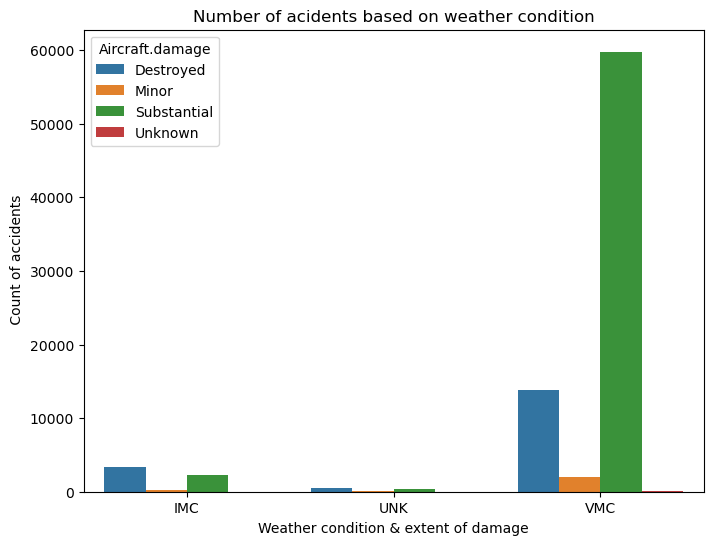

In [27]:
Weather_cnd=df.groupby(['Weather.Condition','Aircraft.damage'])['Event.Id'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=Weather_cnd, x='Weather.Condition', y='Event.Id', hue='Aircraft.damage').set(title="Number of acidents based on weather condition", xlabel='Weather condition & extent of damage', ylabel=' Count of accidents')
plt.show()

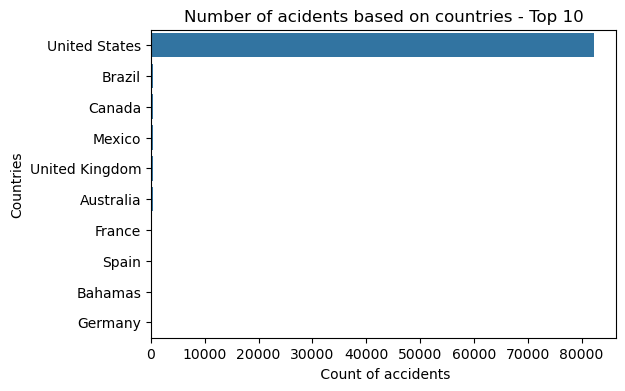

In [28]:
#Check top 10 countries with accidents

cntr=df.groupby(['Country'])['Event.Id'].count().reset_index().sort_values(by='Event.Id', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(data=cntr, y='Country', x='Event.Id', orient="y").set(title="Number of acidents based on countries - Top 10", ylabel='Countries', xlabel=' Count of accidents')
plt.show()

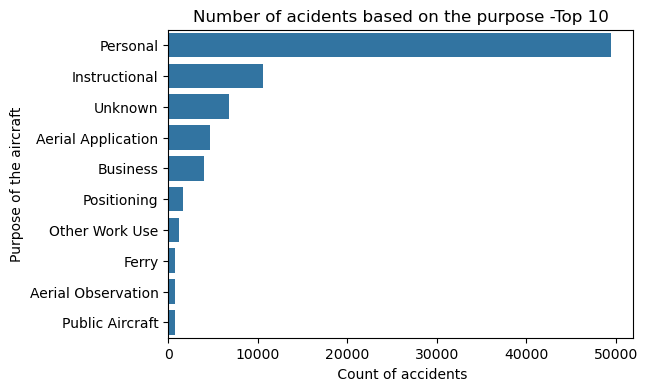

In [29]:
#Check purposes with accidents

cntr=df.groupby(['Purpose.of.flight'])['Event.Id'].count().reset_index().sort_values(by='Event.Id', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(data=cntr, y='Purpose.of.flight', x='Event.Id', orient="y").set(title="Number of acidents based on the purpose -Top 10", ylabel='Purpose of the aircraft', xlabel=' Count of accidents')
plt.show()

#### Exploring some numerical variables

In [30]:
#subset the data into numerical variables only
num_var=df.select_dtypes(include=['number']).drop(columns=['Event_year'])
num_var.head(3)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN


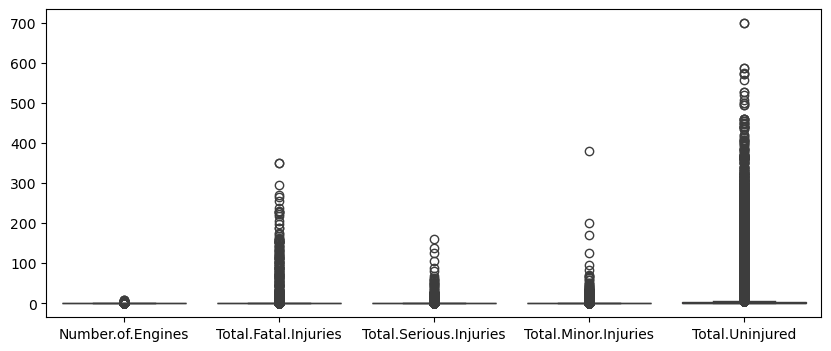

In [31]:
#Visualize the distribution
plt.figure(figsize=(10,4))
sns.boxplot(num_var)
plt.show()

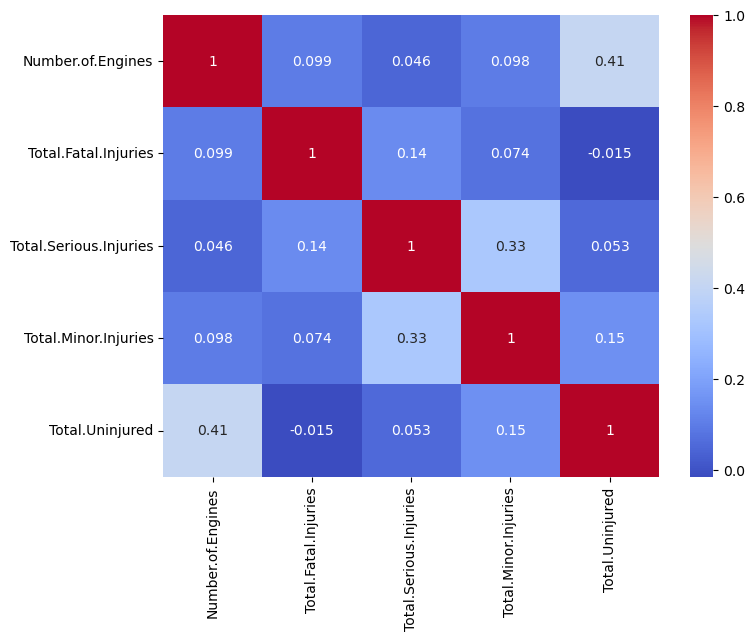

In [32]:
# We check the correlation among the variables

plt.figure(figsize=(8,6))
sns.heatmap(num_var.corr(),annot=True, cmap='coolwarm')
plt.show()

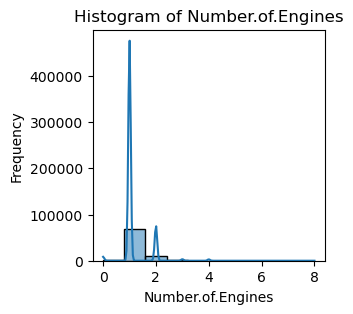

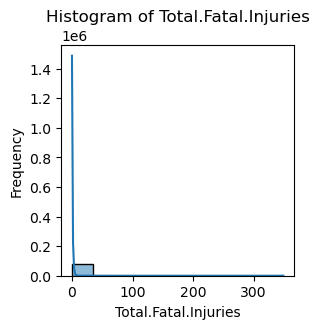

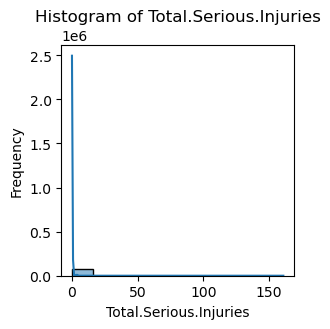

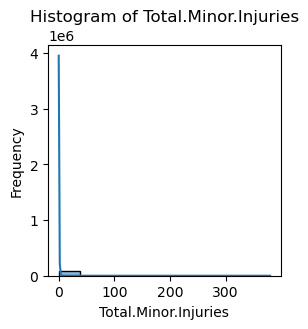

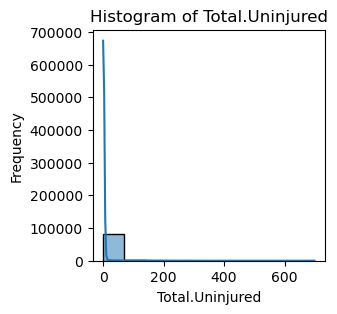

In [33]:
#Create individual figure for each numerical visual
for column in num_var.columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(data=num_var, x=column, kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Further Data Cleaning

In [34]:
#Check the count of missing data  in columns for which the count is greater than zero
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]

missing_cols

Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
Publication.Date          13771
dtype: int64

In [35]:
# replace the missing for Location by mode of each country
df['Location']=df['Location'].fillna(df.groupby('Country')['Location'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [36]:
# replace the missing for Location by mode of countries. 3 locations are unable to clear because they are not associated to any country
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [37]:
#To replace the missing of numerical variables, I will use mean since according to the graphs above, they are nwegatively skewed
df[num_var.columns] = num_var.fillna(num_var.mean())


In [38]:
#We replace the make with the mode and for the model with the mode of each make. 14 models are unable to clean up since they are not associated to any make
df['Make']=df['Make'].fillna(df['Make'].mode()[0])
df['Model']=df['Model'].fillna(df.groupby('Make')['Model'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))


In [39]:
#Report status, Registration.Number, and Publication date  are of no interest to our goal, so I drop them
df=df.drop(columns=['Report.Status','Publication.Date','Registration.Number'], axis=1)

In [40]:
# We replace the Engine type with the mode of make $ Model
df['Engine.Type']=df['Engine.Type'].fillna(df.groupby(['Make','Model'])['Engine.Type'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [41]:
#For the number of engines, we replace the missing with the mode. This is because in our analysis,we would like to treat this variable as categorical
df['Number.of.Engines']=df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0]).astype('int')

#replace aircraft with zero number of enngine with the mode as well
df['Number.of.Engines']=df['Number.of.Engines'].replace(0,df['Number.of.Engines'].mode()[0])

In [42]:
# Finaly we replace the rest of columns with mode

In [43]:
df['Weather.Condition']=df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0])


In [44]:
df['Purpose.of.flight']=df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0])

In [45]:
df['Amateur.Built']=df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0])


In [46]:
df['Injury.Severity']=df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0])


In [47]:
df['Aircraft.damage']= df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0])


In [48]:
#Check if we still have missing
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Location          4
Model            14
Engine.Type    2131
dtype: int64

In [49]:
#These ones did not fill the missing for failing to meet the above approach of repalacing the missing. Therefore we will drop all these records

In [50]:
df=df.dropna(axis=0)

In [51]:
#Confirm no missing
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Series([], dtype: int64)

In [52]:
df.shape

(86740, 20)

In [53]:
#Finally, we saw that the data before 1980 was not sufficiently collected or is inadequate. Since this will influence alot one of our question. 
#I will drop these records

In [54]:
df=df[df['Event_year']>1981]

In [55]:
df.shape # 7 reords have been dropped

(86733, 20)

In [56]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event_year
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982


In [57]:
#View quick descriptive analysis of numerical variables
df.describe(include='number')

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event_year
count,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000
mean,1.151499,0.608270,0.276596,0.355200,5.230265,1998.848039
std,0.412127,4.462733,1.407426,2.091259,26.756940,11.752254
min,1.000000,0.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000,2008.000000
max,8.000000,270.000000,161.000000,380.000000,699.000000,2022.000000


In [58]:
#View quick descriptive analysis of categorical variables
df.describe(exclude ='number')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition
count,86733,86733,86733,86733,86733,86733,86733,86733,86733,86733,86733,86733,86733,86733
unique,85826,2,86712,NaN,26886,212,104,4,7669,11313,2,12,26,3
top,20001212X19172,Accident,DCA22WA130,NaN,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Cessna,152,No,Reciprocating,Personal,VMC
freq,3,83136,2,NaN,445,81229,67039,65808,22251,2411,78531,72321,53997,79724
mean,NaN,NaN,NaN,1999-05-09 12:48:16.337034496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1982-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1988-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1998-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2008-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We now have our clean data and we can perform further Analysis and engineer some features

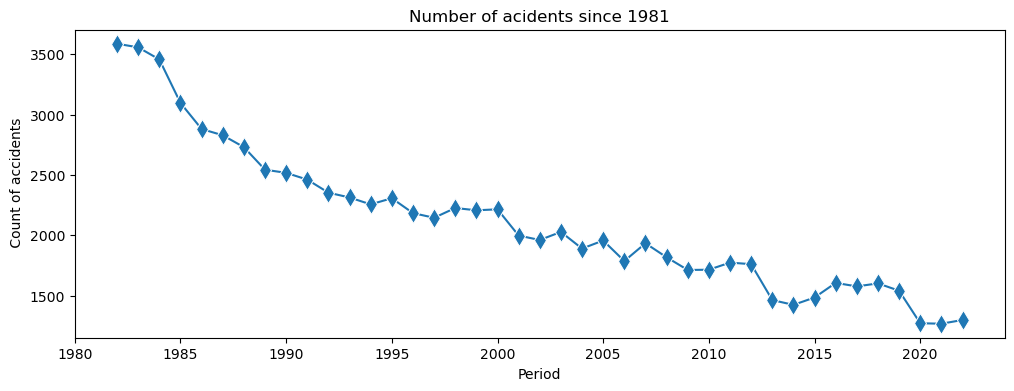

In [59]:
#Check if there is significant pattern in accidents over years
yr_count=df.groupby('Event_year')['Event.Id'].count().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(data=yr_count, x='Event_year', y='Event.Id', marker='d',markersize=10).set(title="Number of acidents since 1981", xlabel='Period', ylabel=' Count of accidents')
plt.savefig("Linegraph1.png", dpi=500, bbox_inches="tight")
plt.show()


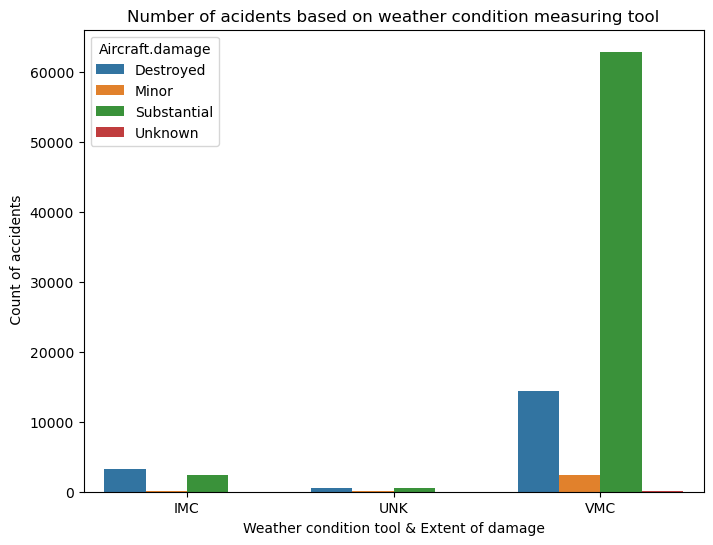

In [67]:
# Lets also explore the effect of weather in regards to the accidents
Weather_cnd=df.groupby(['Weather.Condition','Aircraft.damage'])['Event.Id'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=Weather_cnd, x='Weather.Condition', y='Event.Id', hue='Aircraft.damage').set(title="Number of acidents based on weather condition measuring tool", xlabel='Weather condition tool & Extent of damage', ylabel=' Count of accidents')
#Export the graph
plt.savefig("barplot4.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

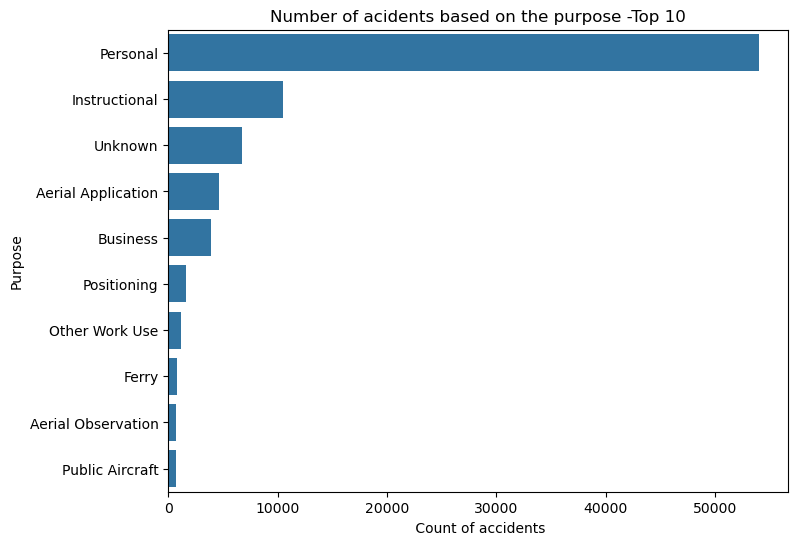

In [61]:
#We further would like to check the accidents occurence with the intended purpose of the aircraft


purp=df.groupby(['Purpose.of.flight'])['Event.Id'].count().reset_index().sort_values(by='Event.Id', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=purp, y='Purpose.of.flight', x='Event.Id', orient="y").set(title="Number of acidents based on the purpose -Top 10", ylabel='Purpose', xlabel=' Count of accidents')

#Export the graph
plt.savefig("barplot2.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

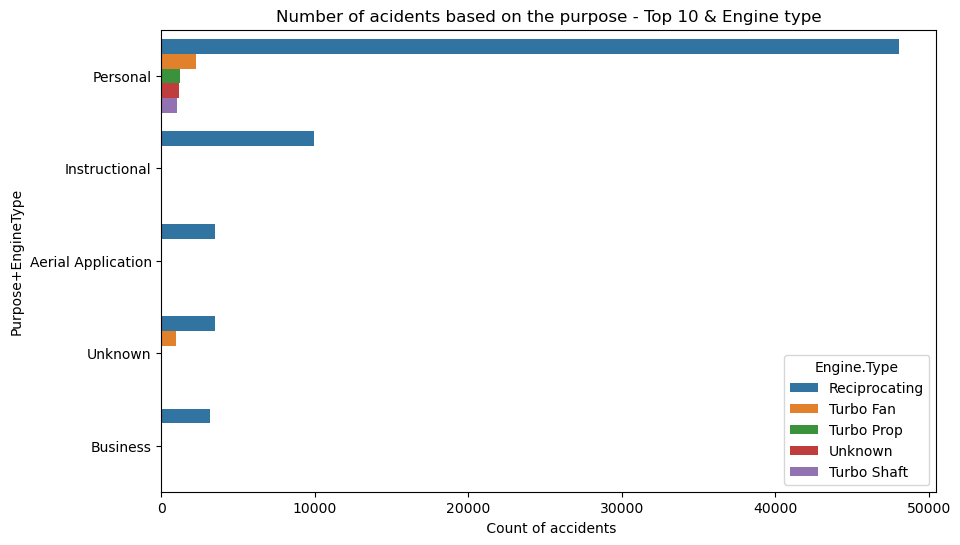

In [62]:
#We further would like to check the accidents occurence with the intended purpose and Engine type of the aircraft


Purp_ET=df.groupby(['Purpose.of.flight','Engine.Type'])['Event.Id'].count().reset_index().sort_values(by='Event.Id', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=Purp_ET, y='Purpose.of.flight', x='Event.Id', hue='Engine.Type').set(title="Number of acidents based on the purpose - Top 10 & Engine type", ylabel='Purpose+EngineType', xlabel=' Count of accidents')
plt.show()

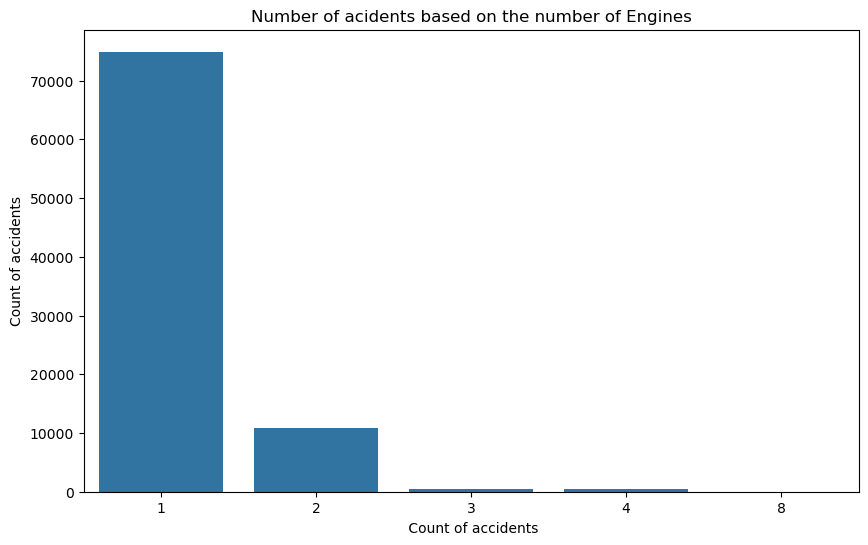

,Number.of.Engines,Event.Id
0,1,74922
1,2,10914
2,3,477
3,4,417
4,8,3


In [63]:
#Let check the influence of number of engines and the number of accidents

cnt_E=df.groupby(['Number.of.Engines'])['Event.Id'].count().reset_index().sort_values(by='Event.Id', ascending=False)
cnt_E
plt.figure(figsize=(10,6))
sns.barplot(data=cnt_E, x='Number.of.Engines', y='Event.Id').set(title="Number of acidents based on the number of Engines", ylabel='Count of accidents', xlabel=' Count of accidents')
#Export the graph

plt.savefig("barplot3.png", dpi=500, bbox_inches="tight")
#Render the graph

plt.show()
#Print a table of the grouped data
cnt_E

In [64]:
Piv_df=pd.pivot_table(df,
                          values='Event.Id',
                          index='Number.of.Engines',
                          columns='Purpose.of.flight',
                          aggfunc='count',
                          fill_value=0)

Piv_df

Purpose.of.flight,ASHO,Aerial Application,Aerial Observation,Air Drop,Air Race show,Air Race/show,Banner Tow,Business,Executive/corporate,External Load,...,PUBL,PUBS,Personal,Positioning,Public Aircraft,Public Aircraft - Federal,Public Aircraft - Local,Public Aircraft - State,Skydiving,Unknown
Number.of.Engines,,,,,,,,,,,,,,,,,,,,,
1,4,4680,715,10,73,49,100,2892,113,110,...,1,3,48721,959,583,81,67,56,145,3718
2,0,12,41,1,3,0,0,1037,420,8,...,0,1,5076,650,120,18,7,8,34,2408
3,0,1,1,0,0,0,0,6,11,0,...,0,0,71,6,2,0,0,0,0,375
4,0,2,0,0,0,0,0,10,0,0,...,0,0,129,11,8,2,0,0,0,236
8,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


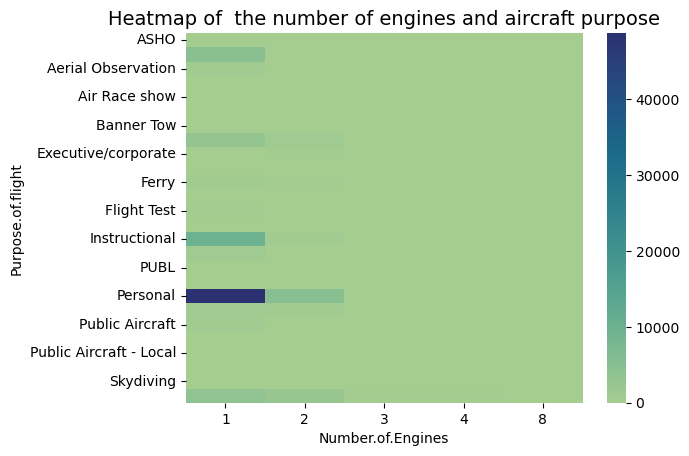

In [65]:
#I will transpose the data so that the label appears horrizontally
Piv_df_T= Piv_df.T

#Plot a heatmap with title
ax=sns.heatmap(Piv_df_T, cmap="crest")#crest)
ax.set_title("Heatmap of  the number of engines and aircraft purpose", fontsize=14)

#Export the graph
plt.savefig("heatmap.png", dpi=500, bbox_inches="tight")

#Render the graph
plt.show()

In [73]:
#Aggregate all injuries 
df['Total_injuries']=df['Total.Fatal.Injuries']+df['Total.Serious.Injuries']+df['Total.Minor.Injuries']

#Group total injuries per year
cnt_injuries=df.groupby(['Event_year'])['Total_injuries'].sum().reset_index().sort_values(by='Event_year', ascending=True)

#Group total of uninjured per year
no_injuries=df.groupby(['Event_year'])['Total.Uninjured'].count().reset_index().sort_values(by='Event_year', ascending=True)

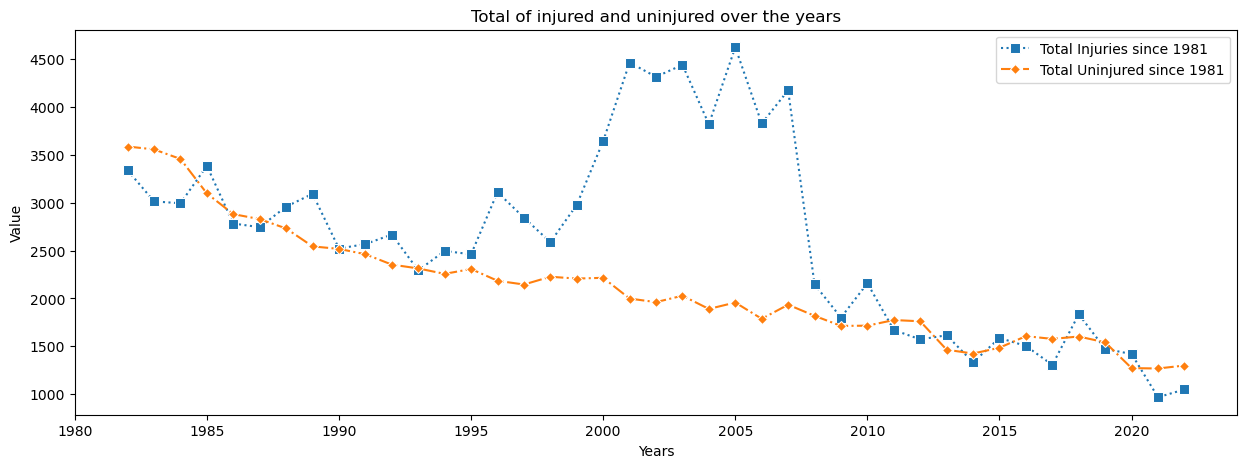

In [84]:
#Plot 2 graphs showing evolution of injuries and no injuries over time
plt.figure(figsize=(15,5))

sns.lineplot(data=cnt_injuries, x='Event_year', y='Total_injuries', label='Total Injuries since 1981', marker='s', markersize=7, linestyle='dotted')
sns.lineplot(data=no_injuries, x='Event_year', y='Total.Uninjured', label='Total Uninjured since 1981', marker='D', markersize=5, linestyle='dashdot')

plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Total of injured and uninjured over the years')
plt.legend()

#Export the graph
plt.savefig("linegraph2.png", dpi=500, bbox_inches="tight")

#Render plot
plt.show()